<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Principal Component Analysis



---



Key Concepts:


*   Singular Value Decomposition
*   Low-Rank Matrix Approximations
*   Principal Component Analysis





#### Set up

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



###Singular Value Decomposition

**Theorem 1.4.2 (The Singular Value Decomposition)**

Let $A$ be an $m \times n$ matrix with the dimension of $\text{col}(A) = r$. Then there exists an $m \times n$ matrix $\Sigma$, where the diagonal entries in $\Sigma$ are the first $r$ singular values of $A$:
$$
\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_r \geq 0
$$
Moreover, there exist an $m \times m$ orthogonal matrix $U$ and an $n \times n$ orthogonal matrix $V$ such that:
$$
A = U \Sigma V^T
$$



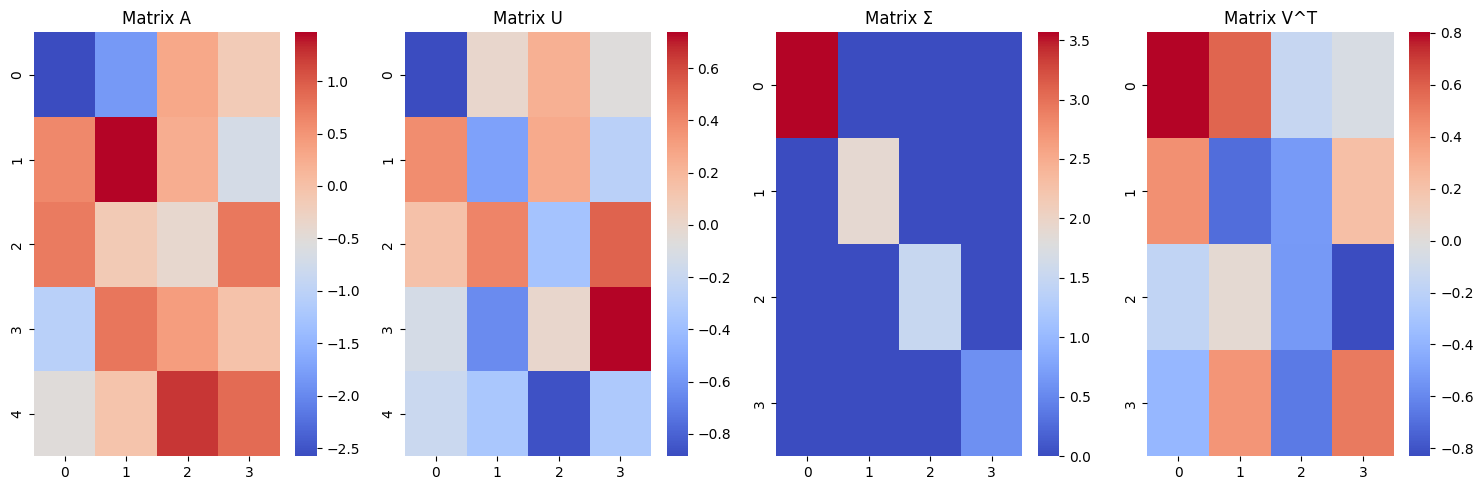

In [5]:
m, n = 5, 4
A = np.random.randn(m, n)

# Singular Value Decomposition
U, s, Vt = np.linalg.svd(A, full_matrices=False)
Sigma = np.diag(s)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# A - Original Matrix
sns.heatmap(A, cmap='coolwarm', ax=axes[0], cbar=True)
axes[0].set_title("Matrix A")

# HU - Orthogonal Matrix
sns.heatmap(U, cmap='coolwarm', ax=axes[1], cbar=True)
axes[1].set_title("Matrix U")

# Σ - Diagonal Matrix
sns.heatmap(Sigma, cmap='coolwarm', ax=axes[2], cbar=True)
axes[2].set_title("Matrix Σ")

# V^T - Orthogogonal Matrix (Right Signular Vectors)
sns.heatmap(Vt, cmap='coolwarm', ax=axes[3], cbar=True)
axes[3].set_title("Matrix V^T")

plt.tight_layout()
plt.show()


###Low-Rank Matrix Approximations

**Definition 1.4.3 (Induced Norm):**
The 2-norm of a matrix $A \in \mathbb{R}^{n \times m} $ is defined as:

$$
\|A\|_2 = \max_{x \neq 0, \|x\|=1} \|Ax\| = \sqrt{\lambda_{\max}(A^T A)}
$$

where $\lambda_{\max}(A^T A) $ is the largest eigenvalue of $A^T A$.

**Theorem 1.4.5 (Eckart-Young-Mirsky Theorem):**
The best rank-k approximation $( A_k )$ of a matrix $A$ (with respect to the 2-norm) is obtained by truncating the SVD of $A$. Specifically:

$$
A_k = \sum_{j=1}^k \sigma_j u_j v_j^T
$$

where $\sigma_j$ are the singular values of $A$, and $u_j$ and $v_j$ are the corresponding left and right singular vectors. For any matrix $ B \in \mathbb{R}^{n \times m}$ of rank at most $k$, the following holds:

$$
\|A - A_k\|_2 \leq \|A - B\|_2
$$

**Lemma 1.4.4 (Matrix Norms and Singular Values):**
Let $A_k$ be the truncated SVD of a matrix $A$. Then:

$$
\|A - A_k\|_2 = \sigma_{k+1}
$$

where $\sigma_{k+1}$ is the $(k+1)$-th singular value of $A$.


2-Norm of the matrix A: 3.938130556552503


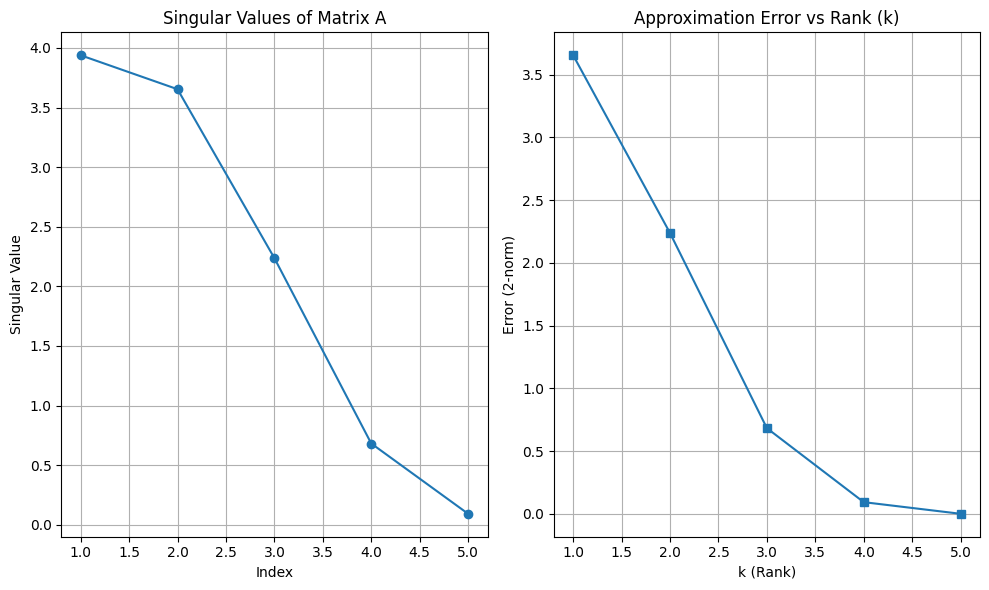

In [8]:
np.random.seed(0)
A = np.random.randn(5, 5)

# SVD of A
U, S, VT = np.linalg.svd(A)
singular_values = S

# Compute largest singular value
norm_2 = singular_values[0]

print(f"2-Norm of the matrix A: {norm_2}")

errors = []
k_values = range(1, len(singular_values) + 1)

# Compute the approximation error
for k in k_values:
    A_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

    error = np.linalg.norm(A - A_k, 2)
    errors.append(error)

plt.figure(figsize=(10, 6))

# Singular values
plt.subplot(1, 2, 1)
plt.plot(k_values, singular_values, 'o-', label='Singular values')
plt.title('Singular Values of Matrix A')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)

# Approximation errors
plt.subplot(1, 2, 2)
plt.plot(k_values, errors, 's-', label='Approximation Error (2-norm)')
plt.title('Approximation Error vs Rank (k)')
plt.xlabel('k (Rank)')
plt.ylabel('Error (2-norm)')
plt.grid(True)

plt.tight_layout()
plt.show()

###Principal Component Analysis

**Covariance Matrix**

Let $[X_1, \ldots, X_N]$ be a $p \times N$ matrix where each $X_i$ is a column vector representing an observation. The sample mean $M$ of the observation vectors $X_1, \ldots, X_N$ is given by:
$$
M = \frac{1}{N} \sum_{i=1}^N X_i
$$

To center the data, subtract the sample mean $M$ from each observation vector:
$$
\hat{X}_k = X_k - M
$$

The columns of the $p \times N$ matrix $B$ are these mean-deviation forms:
$$
B = [ \hat{X}_1, \hat{X}_2, \ldots, \hat{X}_N ]
$$

The covariance matrix $S$ is a $p \times p$ matrix defined by:
$$
S = \frac{1}{N - 1} B B^T
$$
Since $B B^T$ is always positive semidefinite, the covariance matrix $S$ is also positive semidefinite.
<br><br>
**Principal Component Analysis (PCA)**

Assume that the columns of the $p \times N$ data matrix $X = [X_1, X_2, \ldots, X_N]$ are already in mean-deviation form. The goal of PCA is to find $k$ (where $k \leq p$) orthonormal vectors $v_1, \ldots, v_k$ (the top $k$ principal components) that maximize the following objective function:
$$
\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^k \langle X_i \cdot v_j \rangle^2
$$
where $\langle X_i \cdot v_j \rangle$ is the length of the projection of $X_i$ onto $v_j$.

For each principal component $v_j$, we can rephrase the variance-maximization problem as:
$$
\text{argmax}_{\|v\|=1} \; v_j^T XX^T v_j
$$
where $XX^T$ is a $p \times p$ matrix.

Assuming that:
$$
XX^T = V \, \text{diag}(\lambda_1, \ldots, \lambda_p) \, V^T
$$
or equivalently:
$$
V^T XX^T V = \text{diag}(\lambda_1, \ldots, \lambda_p)
$$
where $V = [v_1, \ldots, v_p]$ contains the eigenvectors, the optimal choice of the first $k$ eigenvectors of $XX^T$ corresponds to the largest $k$ eigenvalues.

The orthogonal $p \times p$ matrix $V = [v_1, \ldots, v_p]$ represents the change of variable such that:
$$
x = V y
$$
where:
$$
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_p
\end{pmatrix}
=
\begin{pmatrix}
v_1 & v_2 & \cdots & v_p
\end{pmatrix}
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_p
\end{pmatrix}
$$
In this new coordinate system, the variables $y_1, \ldots, y_p$ are uncorrelated and arranged in order of decreasing variance.

Each observation vector $x$ is transformed to a new vector $y$ using:
$$
y = V^T x
$$
where $y_i = v_i^T x = v_{1i} x_1 + v_{2i} x_2 + \cdots + v_{pi} x_p$. The coefficients $v_{ji}$ are the entries in the eigenvector $v_j$ and are known as loadings.
<br><br>

**Total Variance**

Given the columns of the $p \times N$ data matrix $X$ (assumed to be in mean-deviation form), the covariance matrix $S$ is:
$$
S = \frac{1}{N - 1} XX^T
$$

The diagonal entries $s_{jj}$ of $S$ represent the variance of the $j$-th feature $x_j$. The total variance of the data is the sum of these variances:
$$
\text{Total Variance} = \text{tr}(S)
$$
where $\text{tr}(S)$ denotes the trace of the matrix $S$.

If:
$$
XX^T = V \, \text{diag}(\lambda_1, \ldots, \lambda_p) \, V^T
$$
then:
$$
\text{tr}(S) = \frac{1}{N - 1} \sum_{1}^p \lambda_j
$$

The fraction of variance explained by the first $k$ principal components is:
$$
\frac{\sum_{1}^k \lambda_j}{\sum_{1}^p \lambda_j}
$$


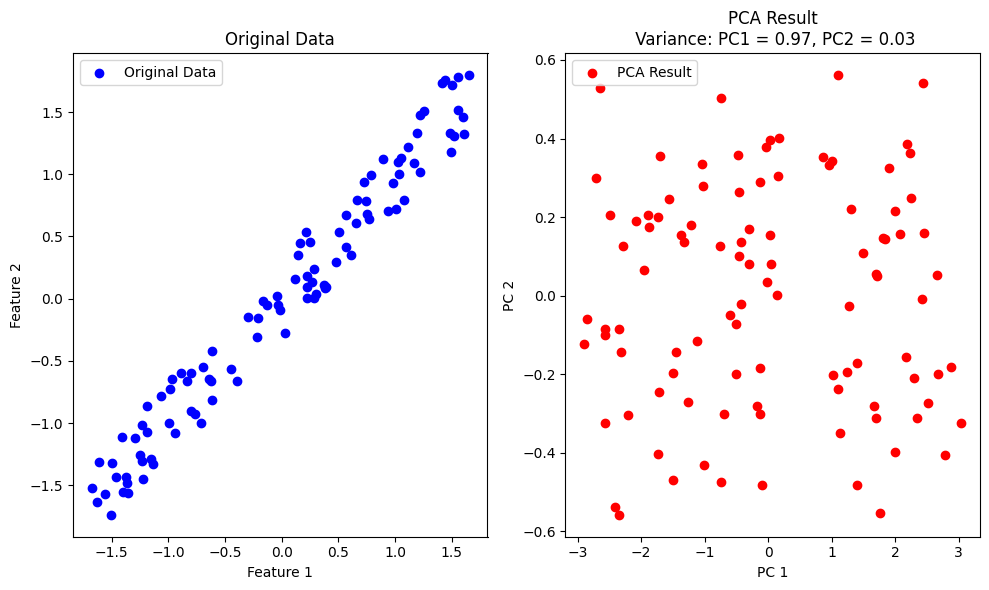

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
n_samples = 100
n_features = 3
X = np.random.rand(n_samples, n_features)

# Data Structures
X[:, 1] = X[:, 0] * 0.5 + np.random.rand(n_samples) * 0.1
X[:, 2] = X[:, 0] * -0.3 + np.random.rand(n_samples) * 0.1

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# PCA Result
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', label='PCA Result')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title(f'PCA Result\n Variance: PC1 = {explained_variance[0]:.2f}, PC2 = {explained_variance[1]:.2f}')
plt.legend()

plt.tight_layout()
plt.show()
